In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
## loading the dataset
df = pd.read_csv('Airline_Delay_Cause.csv')

In [4]:
## basic info
print("Original shape:", df.shape)
print(df.info())
print(df.head())

Original shape: (179338, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179338 entries, 0 to 179337
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 179338 non-null  int64  
 1   month                179338 non-null  int64  
 2   carrier              179338 non-null  object 
 3   carrier_name         179338 non-null  object 
 4   airport              179338 non-null  object 
 5   airport_name         179338 non-null  object 
 6   arr_flights          178997 non-null  float64
 7   arr_del15            178747 non-null  float64
 8   carrier_ct           178997 non-null  float64
 9   weather_ct           178997 non-null  float64
 10  nas_ct               178997 non-null  float64
 11  security_ct          178997 non-null  float64
 12  late_aircraft_ct     178997 non-null  float64
 13  arr_cancelled        178997 non-null  float64
 14  arr_diverted         178997 non-null  f

In [29]:
## dropping null values
df.dropna()
print("After dropping NA:", df.shape)

After dropping NA: (179338, 21)


In [30]:
## delay rate
df['is_delayed'] = (df['arr_del15'] > 0).astype(int)
df['delay_rate'] = df['arr_del15']/df['arr_flights']

## **Temporal Patterns**

In [31]:
monthly_avg = df.groupby('month')['delay_rate'].mean()

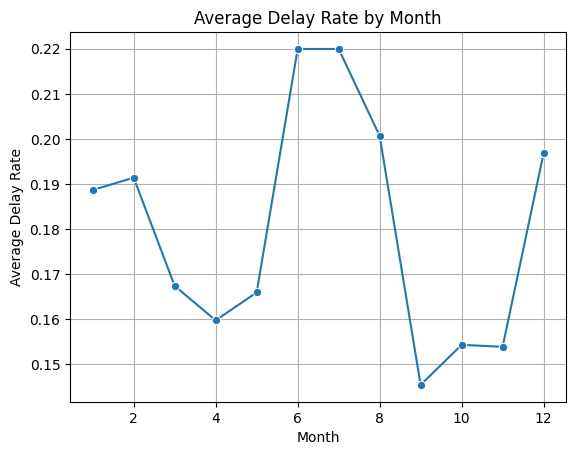

In [32]:
plt.figure()
sns.lineplot(x = monthly_avg.index, y = monthly_avg.values, marker = 'o')
plt.title("Average Delay Rate by Month")
plt.xlabel("Month")
plt.ylabel("Average Delay Rate")
plt.grid(True)
plt.show()

In [ ]:
## Delay rates peak in June and July, suggesting
## seasonal congestion, likely due to summer travel.
## A sharp decline in September–November,which aligns with post-summer and preholiday lull in air traffic.

## **Top Delay-Prone Carriers**

In [33]:
carrier_avg = df.groupby('carrier_name')['delay_rate'].mean().sort_values(ascending = False).head(10)

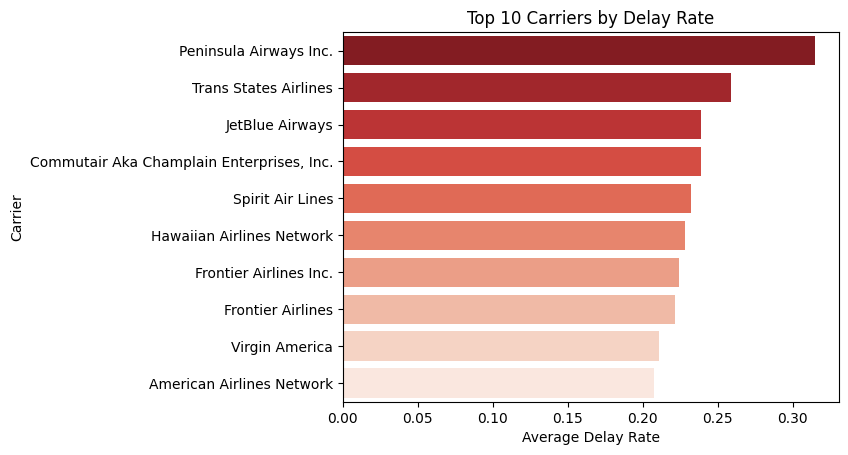

In [34]:
plt.figure()
sns.barplot(x = carrier_avg.values, y = carrier_avg.index, hue = carrier_avg.index, palette = 'Reds_r' , legend = False)
plt.title("Top 10 Carriers by Delay Rate")
plt.xlabel("Average Delay Rate")
plt.ylabel("Carrier")
plt.show()

In [ ]:
## Peninsula Airways and Trans States Airlines have the highest average delay rates among all carriers.
## Majority of top delayed carriers are regional or low-cost airlines, often operating on tighter schedules

## **Top Delay-Prone Airports**

In [35]:
airport_avg = df.groupby('airport_name')['delay_rate'].mean().sort_values(ascending = False).head(10)

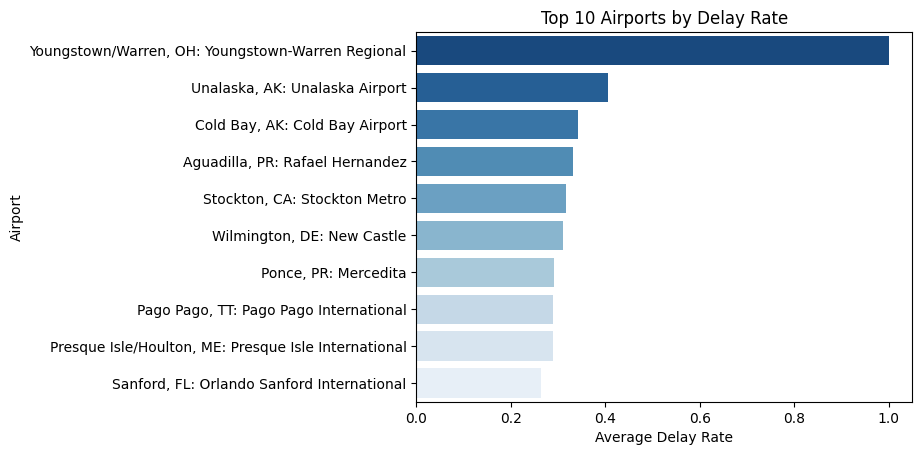

In [36]:
plt.figure()
sns.barplot(x = airport_avg.values, y = airport_avg.index, hue = airport_avg.index, palette = 'Blues_r', legend = False)
plt.title("Top 10 Airports by Delay Rate")
plt.xlabel("Average Delay Rate")
plt.ylabel("Airport")
plt.show()

In [ ]:
## Youngstown-Warren Regional airport has an exceptionally high delay rate, followed by Unalaska and Cold Bay.
## Smaller or remote airports dominate this list — likely due to limited infrastructure or weather exposure.

## **Root Cause Analysis**

In [19]:
delay_types = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
delay_avg = df[delay_types].mean()
delay_avg_pct = (delay_avg / delay_avg.sum()) * 100 

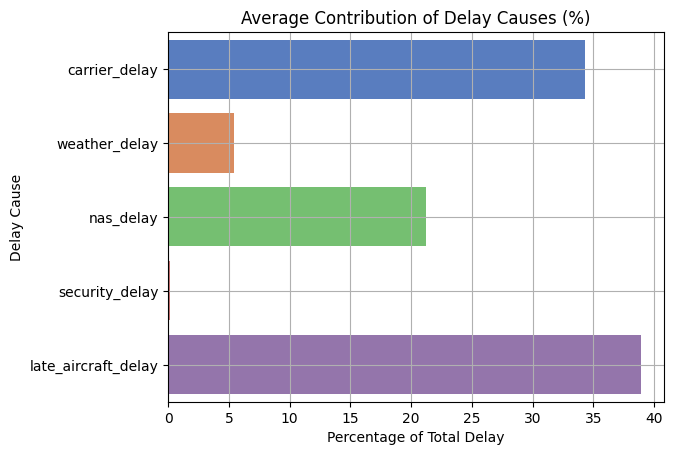

In [21]:
plt.figure()
sns.barplot(x = delay_avg_pct.values, y = delay_avg_pct.index, hue = delay_avg_pct.index, palette = 'muted', legend = False)
plt.title("Average Contribution of Delay Causes (%)")
plt.xlabel("Percentage of Total Delay")
plt.ylabel("Delay Cause")
plt.grid(True)
plt.show()

In [ ]:
## Carrier delay and Late aircraft delay together contribute nearly 75% of total delays.
## Weather and NAS delays are present but secondary; security delays are negligible.

## **Correlation Analysis** ##

<function matplotlib.pyplot.show(close=None, block=None)>

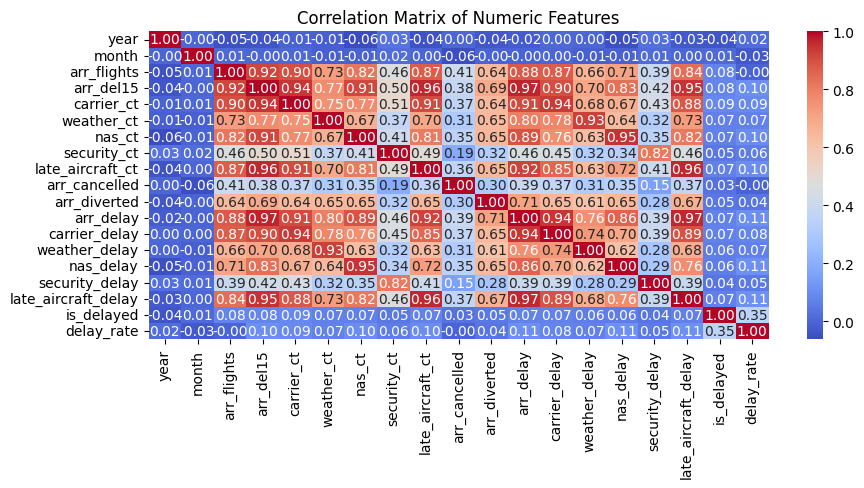

<Figure size 100x100 with 0 Axes>

In [22]:
plt.figure(figsize = (10, 4))
sns.heatmap(df.corr(numeric_only = True), annot = True, fmt = ".2f", cmap = "coolwarm")
plt.title("Correlation Matrix of Numeric Features")
plt.figure(figsize=(1, 1))
plt.show

In [ ]:
# 1. 'arr_del15' (arrival delay over 15 min) is highly correlated with 'carrier_ct', 'late_aircraft_ct', and 'arr_flights',
#    indicating that carrier and aircraft turnaround issues contribute significantly to delays.

# 2. Strong correlation (>= 0.9) between 'arr_delay' and 'late_aircraft_delay', 'carrier_delay' suggests overlap in operational delays.

# 3. 'is_delayed' and 'delay_rate' show small but positive correlations with delay causes,
#    hinting they are useful indicators for binary classification and regression tasks.

# 4. Features like 'security_delay' and 'year' have low correlation with most variables,
#    indicating lesser influence on delay variability.